Итераций: 4
Минимум функции равен: 10.009484
x1 : -4.093527e+00	x2 : 6.951805e-03	x3 : -8.491592e+00	

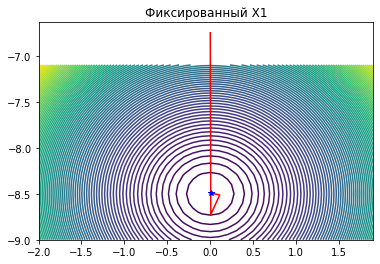

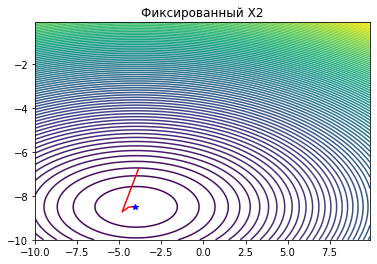

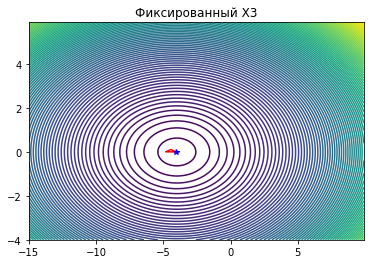

In [2]:
import numpy as np

def func(x):
    return x[0]**2 + 8*x[0] + 5*x[1]**2 + 7*x[2]**2 + 119.0*x[2] + 531.75

def search(x0, s, alpha):
    al = 2 # коэф удачи
    be = -0.5 # коэф неудачи
    x1 = x0[:]
    lose = 0
    alpha_in = alpha[:]
    while lose != len(x0):
        lose = 0
        for i in range(len(x0)):
            y = x1 + alpha[i]*s[i]
            if func(y) < func(x1):   # удача
                alpha_in[i] *= al
                x1 = y
            else:           # неудача
                alpha_in[i] *= be
                lose += 1
        alpha = alpha_in                
    return x1

def search_directions(x1, x0, s):    # построение новых направлений поиска
    x1_in = x1[:]
    s_in = s[:]
    x0_in = x0[:]
    a = np.zeros((len(x0),len(x0)))  # компоненты векторов
    alpha = np.zeros((len(x0)))
    for i in range(len(x0)):    # Определяем шаг из х0 в х1
        alpha[i] = x1_in[i] - x0_in[i]
    a[0] = alpha[0]*s_in[0] + alpha[1]*s_in[1] + alpha[2]*s_in[2]
    a[1] = alpha[1]*s_in[1] + alpha[2]*s_in[2]
    a[2] = alpha[2]*s_in[2]
    s_new = np.zeros((len(x0),len(x0)))
    if np.linalg.norm(a[0]) == 0:
        return 0
    s_new[0] = a[0] / np.linalg.norm(a[0])
    b2 = a[1] - (np.dot(a[1],s_new[0])/np.dot(s_new[0],s_new[0]))*s_new[0]
    s_new[1] = b2 / np.linalg.norm(b2)
    b3 = a[2] - (np.dot(a[2],s_new[0])/np.dot(s_new[0],s_new[0]))*s_new[0] - (np.dot(a[2],b2)/np.dot(b2,b2))*b2
    s_new[2] = b3 / np.linalg.norm(b3)
    return s_new



dots_for_x0_x2=[]
dots_for_x1_x2=[]
dots_for_x0_x1=[]

alpha = [0.3, 0.2, 0.1]  # ставить столько, сколько переменных
                         # для удачного выполнения, надо подобрать alpha
x0 = [8, -2, 6]
eps = 0.01

s = np.zeros((len(x0),len(x0)))

for i in range(len(x0)):
    for j in range(len(x0)):
        if i == j:
            s[i][j] = 1
        else:
            s[i][j] = 0

x1 = search(x0, s, alpha)
s = search_directions(x1, x0, s)
x0 = x1
graph_for_x0_x2 = [x1[0], x1[2]]
graph_for_x1_x2 = [x1[1], x1[2]]
graph_for_x0_x1 = [x1[0], x1[1]]
i = 1
dots_for_x0_x2.append(graph_for_x0_x2)
dots_for_x1_x2.append(graph_for_x1_x2)
dots_for_x0_x1.append(graph_for_x0_x1)
while True:
    x1 = search(x0, s, alpha)
    s = search_directions(x1, x0, s)
    graph_for_x0_x2 = [x1[0], x1[2]]
    graph_for_x1_x2 = [x1[1], x1[2]]
    graph_for_x0_x1 = [x1[0], x1[1]]
    dots_for_x0_x2.append(graph_for_x0_x2)
    dots_for_x1_x2.append(graph_for_x1_x2)
    dots_for_x0_x1.append(graph_for_x0_x1)
    if np.linalg.norm(x1-x0)/np.linalg.norm(x0) < eps:
        x_min = x1
        print('Итераций: %d' %i)
        print('Минимум функции равен: %f' %func(x1))
        for i in range(len(x0)):
            print('x%d : %e' %(i+1,x1[i]), end = '\t')
        break
    i += 1
    x0 = x1    
    
# Для построения contour графика векторная функция не подходит

def f_for_plot_fixX0(x1,x2):
    x0 = x_min[0]
    return x0**2 + 8*x0 + 5*x1**2 + 7*x2**2 + 119.0*x2 + 531.75

def f_for_plot_fixX1(x0,x2):
    x1 = x_min[1]
    return x0**2 + 8*x0 + 5*x1**2 + 7*x2**2 + 119.0*x2 + 531.75

def f_for_plot_fixX2(x0,x1):
    x2 = x_min[2]
    return x0**2 + 8*x0 + 5*x1**2 + 7*x2**2 + 119.0*x2 + 531.75

import matplotlib.pyplot as plt

xmin = x1[1]
ymin = x1[2]    
X,Y=np.array(dots_for_x1_x2).T
xlist,ylist=np.meshgrid(np.arange(-2,2,0.1),np.arange(-9,-7,0.1))
plt.contour(xlist,ylist,f_for_plot_fixX0(xlist,ylist),100)
plt.plot(X,Y,'-r')
plt.plot(xmin,ymin,'b*')
plt.title('Фиксированный X1')
plt.show()

xmin = x1[0]
ymin = x1[2]    
X,Y=np.array(dots_for_x0_x2).T
xlist,ylist=np.meshgrid(np.arange(-10,10,0.1),np.arange(-10,0,0.1))
plt.contour(xlist,ylist,f_for_plot_fixX1(xlist,ylist),100)
plt.plot(X,Y,'-r')
plt.plot(xmin,ymin,'b*')
plt.title('Фиксированный X2')
plt.show()

xmin = x1[0]
ymin = x1[1]    
X,Y=np.array(dots_for_x0_x1).T
xlist,ylist=np.meshgrid(np.arange(-15,10,0.1),np.arange(-4,6,0.1))
plt.contour(xlist,ylist,f_for_plot_fixX2(xlist,ylist),100)
plt.plot(X,Y,'-r')
plt.plot(xmin,ymin,'b*')
plt.title('Фиксированный X3')
plt.show()


